In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn as sk

In [2]:
#@title データ生成のパラメータ

th1 = 1.7  #@param {type:"slider", min:0, max:10, step:0.1}
th2 = 2.2  #@param {type:"slider", min:0, max:10, step:0.1}
th3 = 1.2  #@param {type:"slider", min:0, max:10, step:0.1}
th4 = 0.4  #@param {type:"slider", min:0, max:10, step:0.1}


def dist():  # データの分布
    x1 = np.random.normal(0, 1.414)  # normal -> ガウス分布
    x2 = np.random.laplace(0, 1)  # laplace -> ラプラス分布
    return x1, x2

def truey(x1, x2):  # 真の識別関数
    if th1 * x1**2 + th2 * x1 * x2 - th3 * x2**2 < th4:
        return 1
    else:
        return -1

def generate(N):  # N個のサンプルを生成
    X = np.zeros((N, 2))
    y = np.zeros(N, dtype=int)
    for i in range(N):
        x1, x2 = dist()
        y[i] = truey(x1, x2)
        X[i, 0] = x1
        X[i, 1] = x2

    return X, y

def generalization_error(f, M):  # f の汎化誤差をM個のサンプルで近似
    correct = 0
    for i in range(M):
        x1, x2 = dist()
        y = f([[x1, x2]])

        if truey(x1, x2) == 1 and y == 1:
            correct = correct + 1
        elif truey(x1, x2) == -1 and y == -1:
            correct = correct + 1

    return 1 - 1.0 * correct / M

X,y = generate(5)
X,y

(array([[ 1.47762979, -1.62002651],
        [ 2.28830491, -0.09606021],
        [-1.89966322,  0.36075599],
        [ 0.88866269, -0.94311474],
        [ 0.69001255, -0.03885887]]), array([ 1, -1, -1,  1, -1]))

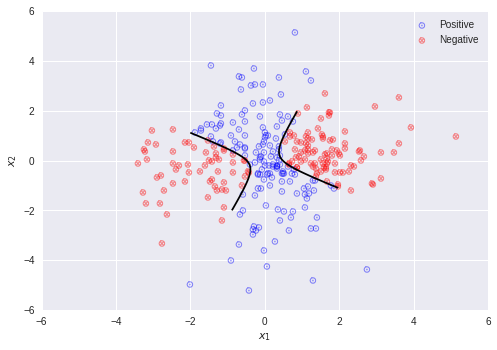

In [10]:
def make_graph(X,y):
  #真の識別関数の描画
  delta = 0.025
  x1range = np.arange(-2, 2, delta)
  x2range = np.arange(-2, 2, delta)
  X1, X2 = np.meshgrid(x1range, x2range)
  Z = th1 * X1**2 + th2 * X1 * X2 - th3 * X2**2
  plt.contour(X1, X2, Z, [th4], colors='black')
  
  #(X,y)データプロット
  plt.scatter(X[y == 1, 0],X[y == 1, 1],\
              c="b",alpha=0.4,marker=r'$\odot$',label="Positive")
  plt.scatter(X[y == -1, 0],X[y == -1, 1],\
              c="r",alpha=0.4,marker=r'$\otimes$',label="Negative")
  plt.xlim([-6, 6])
  plt.ylim([-6, 6])
  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.legend(loc=1)
  plt.show()
  
#サンプルの生成
X, y = generate(300)
make_graph(X,y)

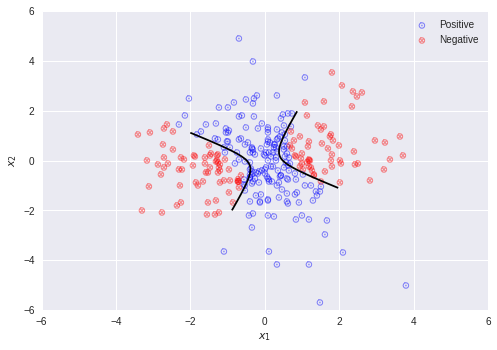

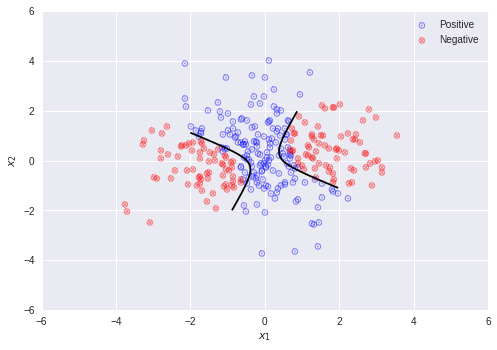

In [13]:
from sklearn.svm import SVC
svm= SVC(kernel='rbf',gamma=0.2,C=1.0)

X,y = generate(300)
svm.fit(X,y)
Yhat = svm.predict(X)
make_graph(X,Yhat)

x_test,y_test = generate(300)
yhat= svm.predict(x_test)

make_graph(x_test,yhat)

In [18]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, yhat))
print(accuracy_score(y_test, yhat))

             precision    recall  f1-score   support

         -1       1.00      0.84      0.91       163
          1       0.84      1.00      0.91       137

avg / total       0.93      0.91      0.91       300

0.9133333333333333


In [19]:
generalization_error(svm.predict, 300)

0.07333333333333336

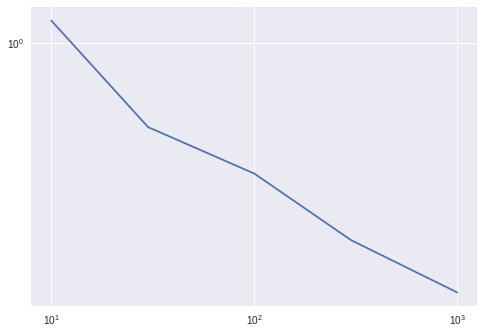

In [52]:
from statistics import mean, stdev
k = [10,30,100,300,1000]
r = []
for l in k:
  z = []
  for _ in range(30):
    z.append(generalization_error(svm.predict, l))
  lin = [i for i in range(10)]
  r += [stdev(z)/mean(z)]

plt.xscale("log")
plt.yscale("log")
plt.plot(k,r)
plt.show()

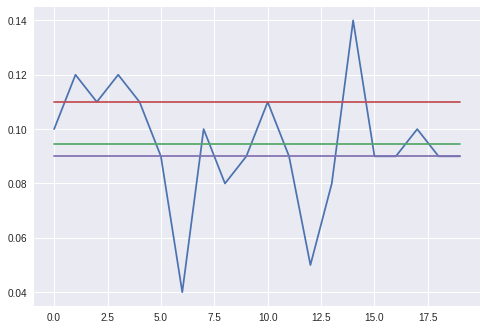

In [60]:
z = [generalization_error(svm.predict, 100) for _ in range(20)]
plt.plot([i for i in range(20)], z)
plt.plot([i for i in range(20)],\
         [(mean(z), np.percentile(z, 75), np.percentile(z, 25)) for _ in range(20)])
plt.show()